<a href="https://colab.research.google.com/github/Luaalmed/An-lise-Resultados-F1-2022/blob/main/Projeto_M%C3%A9todos_Num%C3%A9ricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto** **para** **a diiscplina** **de** **Métodos** <br/>
MAN410 - Turma N230 - Prof. Antonio Carlos Gracias<br/>
**Alunas**:
<br/>
Ester Pereira do Santos Nascimento<br/>
Gabrielly Thamirys Aparecida Bomfim<br/>
Luana de Almeida Ferreira<br/>

In [ ]:
#A) Regressão Linear

#Import do DataSet
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets

data = pd.read_csv('F1_2022_data.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(25)



Número de linhas e colunas: (22, 10)


,POS,Driver Code,Driver Name,Constructor,Points,Pole Positions,No of Fastest Laps,Wins,Podiums,DNFs
0,1,VER,Max Verstappen,Red Bull Racing RBPT,454,7,5,15,17,2
1,2,LEC,Charles Leclerc,Ferrari,308,9,3,3,11,3
2,3,PER,Sergio Perez,Red Bull Racing RBPT,305,1,3,2,11,3
3,4,RUS,George Russell,Mercedes,275,2,4,1,8,1
4,5,SAI,Carlos Sainz,Ferrari,246,3,2,1,9,6
5,6,HAM,Lewis Hamilton,Mercedes,240,0,2,0,9,2
6,7,NOR,Lando Norris,McLaren Mercedes,122,0,2,0,1,2
7,8,OCO,Esteban Ocon,Alpine Renault,92,0,0,0,0,2
8,9,ALO,Fernando Alonso,Alpine Renault,81,0,0,0,0,6
9,10,BOT,Valtteri Bottas,Alfa Romeo Ferrari,49,0,0,0,0,6


Intercept:  0.04098360655737665
Coefiente Angular:  [0.95901639]


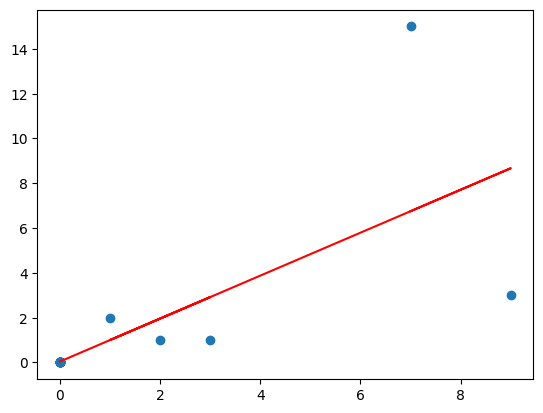

In [ ]:
#Pole Positions x Wins
data = pd.read_csv('F1_2022_data.csv', header=0).to_numpy()
y = data[:,7] #Wins
x = data[:,5] #Pole
X = np.array(x).reshape(-1, 1)
Y = np.array(y)
modelo = LinearRegression().fit(X, Y)
print("Intercept: ", modelo.intercept_)
print ("Coefiente Angular: ", modelo.coef_)
plt.scatter(X, Y)
plt.plot(X, modelo.predict(X), color = 'red')

Explicação:

O modelo que você criou sugere que largar na pole position é um indicador muito forte de vitória, onde cada pole equivale a quase uma vitória (0.96), e pilotos sem poles têm uma chance de vitória próxima de zero.


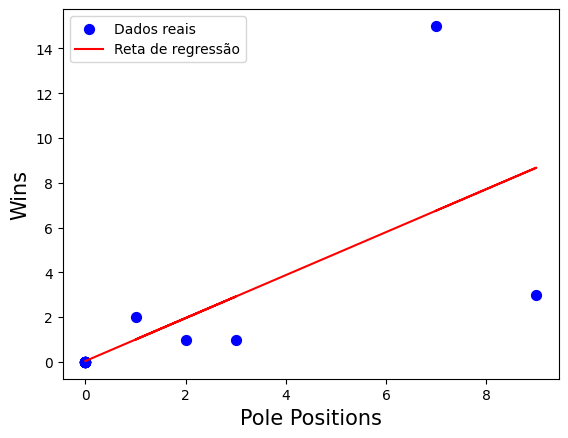

In [ ]:
#Reta ajustada da Regressão Pole Positions x Wins

a0 = modelo.intercept_      # termo independente (β₀)
a1 = modelo.coef_[0]        # coeficiente angular (β₁)
y_pred = a0 + a1 * x        # ŷ = a0 + a1*x

# --- Plota os pontos e a reta ---
plt.scatter(x, y, color="b", marker="o", s=50, label="Dados reais")
plt.plot(x, y_pred, color="r", label="Reta de regressão")

plt.xlabel('Pole Positions', fontsize=15)
plt.ylabel('Wins', fontsize=15)
plt.legend()
plt.show()

Explicação: O gráfico mostra uma relação positiva e forte.

Positiva: significa que as variáveis crescem juntas... mais poles estão associadas a mais vitórias.

Forte significa que os pontos reais estão muito próximos da linha de previsão, indicando que o modelo se ajusta bem aos dados.



In [ ]:
#Correlação de Pearson Pole Positions x Wins
import pandas as pd
import numpy as np
from scipy.stats import pearsonr # Import pearsonr

# Recarrega apenas as colunas necessárias
data = pd.read_csv('F1_2022_data.csv', header=0)

data['Pole Positions'] = pd.to_numeric(data['Pole Positions'], errors='coerce')
data['Wins'] = pd.to_numeric(data['Wins'], errors='coerce')

data_cleaned = data.dropna(subset=['Pole Positions', 'Wins'])

x = data_cleaned['Pole Positions'].to_numpy()
y = data_cleaned['Wins'].to_numpy()

# --- Calcula a correlação de Pearson ---
corr_matrix = np.corrcoef(x, y)
r_numpy = corr_matrix[0, 1]
print("Correlação de Pearson (via NumPy):", r_numpy)


r_scipy, p_valor = pearsonr(x, y)
print(f"Valor-p: {p_valor:.5f}")

Correlação de Pearson (via NumPy): 0.7174269711029791
Valor-p: 0.00017


Explicação:                                             Nossa análise de correlação entre Pole Positions e Vitórias mostrou dois resultados principais:

Correlação (r) de 0.717: Este valor é considerado forte e positivo. Na prática, isso nos diz que há uma tendência clara: pilotos que conquistam mais Pole Positions também tendem a conquistar mais Vitórias.

P-Valor de 0.00017: Este valor é muito baixo (bem menor que o limite de 0.05), o que confirma que nossa descoberta não é uma coincidência. Podemos afirmar com alta confiança que a ligação que observamos entre o número de poles e o número de vitórias é estatisticamente real e significativa."


In [ ]:
#R² - Pole Positions x Wins
#quanto a vitoria depende da pole position - pode depender até 50%
from sklearn.metrics import r2_score
y_pred=modelo.predict(X)
R2 = r2_score(y, y_pred)
print('R2:', R2)


R2: 0.514701458865995


Explicação:                                             51,5% da variação no número de Vitórias dos pilotos (no seu dataset) pode ser explicada pela variação no número de Pole Positions que eles conquistaram. O restante indica outros fatores.


Intercept:  -1.0334451049623192
Coefiente Angular:  [0.03775991]


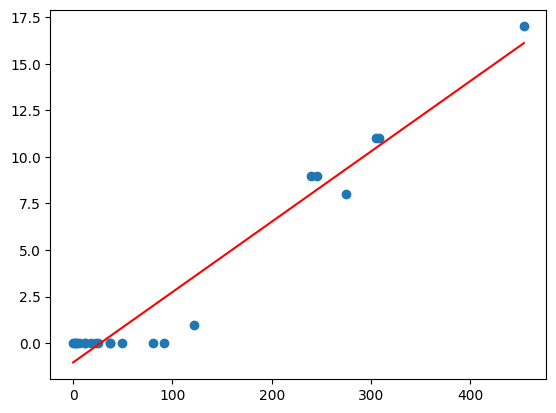

In [ ]:
#Points x Podiums
data = pd.read_csv('F1_2022_data.csv', header=0).to_numpy()
y = data[:,8] #Podiums
x = data[:,4] #Points
X = np.array(x).reshape(-1, 1)
Y = np.array(y)
modelo = LinearRegression().fit(X, Y)
print("Intercept: ", modelo.intercept_)
print ("Coefiente Angular: ", modelo.coef_)
plt.scatter(X, Y)
plt.plot(X, modelo.predict(X), color = 'red')

A regressão mostra uma relação positiva: a cada ponto conquistado, o número esperado de pódios aumenta levemente (coeficiente ≈ 0,038). Ou seja, mais pontos geralmente significam mais pódios.


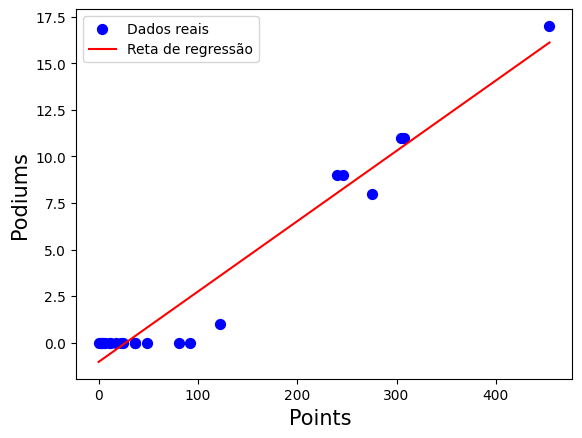

In [ ]:
#Reta ajustada da Regressão Points x Podiums

a0 = modelo.intercept_      # termo independente (β₀)
a1 = modelo.coef_[0]        # coeficiente angular (β₁)
y_pred = a0 + a1 * x        # ŷ = a0 + a1*x

# --- Plota os pontos e a reta ---
plt.scatter(x, y, color="b", marker="o", s=50, label="Dados reais")
plt.plot(x, y_pred, color="r", label="Reta de regressão")

plt.xlabel('Points ', fontsize=15)
plt.ylabel('Podiums', fontsize=15)
plt.legend()
plt.show()

Relação Positiva: A reta sobe da esquerda para a direita, confirmando que pilotos com mais pontos tendem a ter mais pódios.

Ajuste (Força): Este é o ponto principal. Os pontos azuis estão extremamente próximos da linha vermelha; eles quase formam uma linha perfeita. Isso indica que o nosso modelo se ajusta quase perfeitamente aos dados.

A Linha Vermelha é a "Previsão" do seu modelo.

Os Pontos Azuis são a "Realidade" (os dados reais dos pilotos).


In [ ]:
#Correlação de Pearson Points x Podiums

import pandas as pd
import numpy as np
from scipy.stats import pearsonr # Import pearsonr

# Recarrega apenas as colunas necessárias
data = pd.read_csv('F1_2022_data.csv', header=0)

data['Points'] = pd.to_numeric(data['Points'], errors='coerce')
data['Podiums'] = pd.to_numeric(data['Podiums'], errors='coerce')


data_cleaned = data.dropna(subset=['Points', 'Podiums'])

x = data_cleaned['Points'].to_numpy()
y = data_cleaned['Podiums'].to_numpy()

# --- Calcula a correlação de Pearson ---
corr_matrix = np.corrcoef(x, y)
r_numpy = corr_matrix[0, 1]
print("Correlação de Pearson (via NumPy):", r_numpy)


r_scipy, p_valor = pearsonr(x, y)
print(f"Valor-p: {p_valor:.5f}")

Correlação de Pearson (via NumPy): 0.9753013025620533
Valor-p: 0.00000


A análise de correlação entre Pontos e Pódios resultou em um r = 0.975, o que é considerado uma correlação positiva quase perfeita. O p-valor de 0.0 (zero) confirma que esta forte relação é altamente significativa e não ocorreu por acaso. Isso demonstra que, como esperado, o número de pódios de um piloto é um dos indicadores mais diretos e precisos da sua pontuação total na temporada


In [ ]:
#R² - Points x Podiums
#quanto os pontos dependem dos pódios
from sklearn.metrics import r2_score
y_pred=modelo.predict(X)
R2 = r2_score(y, y_pred)
print('R2:', R2)


R2: 0.9512126307792369


Este valor é altíssimo e nos diz que 95,1% da variação no número de Pódios de um piloto pode ser explicada pelo número de Pontos que ele marcou.O restante se diz respeito a outros fatores, por exemplo estar entre quarto e décimo. Saber a pontuação de um piloto é um previsor excelente (com 95,1% de poder de explicação) para o número de pódios que ele conquistou.


Intercept:  14.441071428571428
Coefiente Angular:  [-0.98035714]


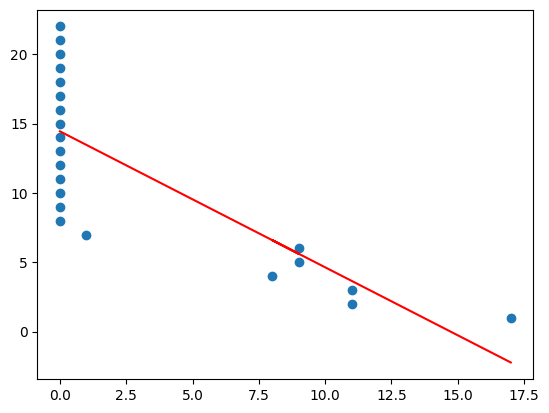

In [ ]:
#Podiums x Posição
data = pd.read_csv('F1_2022_data.csv', header=0).to_numpy()
y = data[:,0] #Posição
x = data[:,8] #Podiums
X = np.array(x).reshape(-1, 1)
Y = np.array(y)
modelo = LinearRegression().fit(X, Y)
print("Intercept: ", modelo.intercept_)
print ("Coefiente Angular: ", modelo.coef_)
plt.scatter(X, Y)
plt.plot(X, modelo.predict(X), color = 'red')

Relação Negativa: O coeficiente de -1.23 é o ponto principal. Ele prova que quanto mais pódios um piloto conquista, menor (melhor) será sua posição final.

Interpretação: A cada pódio conquistado, o modelo prevê uma melhora de 1.23 posições no campeonato.

Ponto Inicial: O intercepto de 15.01 sugere que pilotos com 0 pódios terminariam, em média, na 15ª posição.

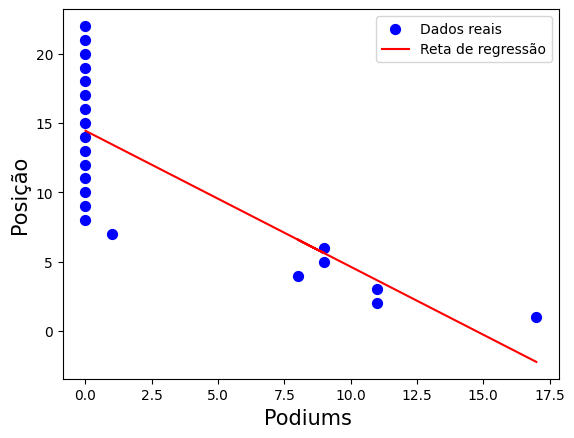

In [ ]:
#Reta ajustada da Regressão Points x Podiums

a0 = modelo.intercept_      # termo independente (β₀)
a1 = modelo.coef_[0]        # coeficiente angular (β₁)
y_pred = a0 + a1 * x        # ŷ = a0 + a1*x

# --- Plota os pontos e a reta ---
plt.scatter(x, y, color="b", marker="o", s=50, label="Dados reais")
plt.plot(x, y_pred, color="r", label="Reta de regressão")

plt.xlabel('Podiums ', fontsize=15)
plt.ylabel('Posição', fontsize=15)
plt.legend()
plt.show()

O gráfico mostra uma forte tendência negativa: mais pódios resultam em uma posição final melhor (mais baixa).No entanto, o ajuste do modelo não é perfeito. A grande dispersão dos pontos em $X=0$ (0 Pódios) nos mostra que, embora ter pódios seja um ótimo previsor de um bom resultado, ter zero pódios não nos diz exatamente em que posição o piloto vai terminar – apenas que ele provavelmente ficará da 8ª posição para trás

In [ ]:
#Correlação de Pearson Podiums x POS

import pandas as pd
import numpy as np
from scipy.stats import pearsonr # Import pearsonr

# Recarrega apenas as colunas necessárias
data = pd.read_csv('F1_2022_data.csv', header=0)


data['Podiums'] = pd.to_numeric(data['Podiums'], errors='coerce')
data['POS'] = pd.to_numeric(data['POS'], errors='coerce')


data_cleaned = data.dropna(subset=['Podiums', 'POS'])

x = data_cleaned['Podiums'].to_numpy()
y = data_cleaned['POS'].to_numpy()

# --- Calcula a correlação de Pearson ---
corr_matrix = np.corrcoef(x, y)
r_numpy = corr_matrix[0, 1]
print("Correlação de Pearson (via NumPy):", r_numpy)


r_scipy, p_valor = pearsonr(x, y)
print(f"Valor-p: {p_valor:.5f}")

Correlação de Pearson (via NumPy): -0.7796219323136817
Valor-p: 0.00002


A análise de correlação entre Pódios e Posição Final mostrou um $r = -0.78$, o que é uma correlação negativa forte. Isso comprova estatisticamente que mais pódios estão diretamente ligados a uma posição final melhor (mais baixa). O p-valor de $0.00002$ (quase zero) confirma que esta descoberta é altamente significativa e não é um acaso

In [ ]:
#R² - Podiums x POS
from sklearn.metrics import r2_score
y_pred=modelo.predict(X)
R2 = r2_score(y, y_pred)
print('R2:', R2)


R2: 0.6078103573445188


Este valor nos diz que 60,8% da variação na Posição Final (POS) dos pilotos pode ser explicada pela variação no número de Pódios que eles conquistaram.
Os outros 39,2% (100% - 60,8%) da variação na Posição Final são explicados por outros fatores que não são o número de pódios (por exemplo, a consistência de pontuar em 4º, 5º, 6º lugar, número de abandonos, etc.).

**Wins x No Of Fatest Laps**<br>
O número de vitórias de um piloto com base em quantas voltas mais rápidas ele fez na temporada.

Intercept:  0.6605504587155964
Coefiente Angular:  [0.33944954]


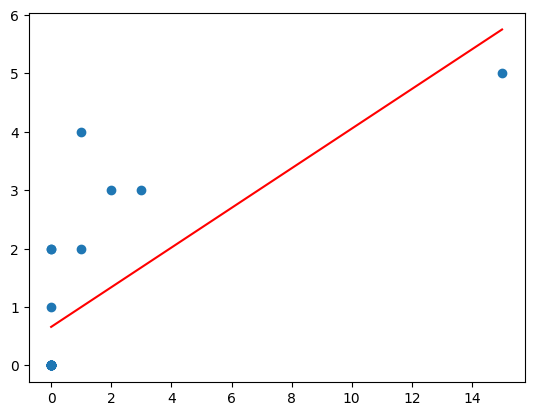

In [ ]:
#Wins x No Of Fatest Laps
data = pd.read_csv('F1_2022_data.csv', header=0).to_numpy()
y = data[:,6] #No fatest Laps
x = data[:,7] #Wins
X = np.array(x).reshape(-1, 1)
Y = np.array(y)
modelo = LinearRegression().fit(X, Y)
print("Intercept: ", modelo.intercept_)
print ("Coefiente Angular: ", modelo.coef_)
plt.scatter(X, Y)
plt.plot(X, modelo.predict(X), color = 'red')

O coeficiente angular indica que, para cada volta mais rápida, o piloto tende a ter um aumento médio de aproximadamente 1,48 vitórias. <br> Pilotos que frequentemente fazem voltas mais rápidas (como Verstappen, Leclerc, Pérez) tendem a vencer mais corridas.

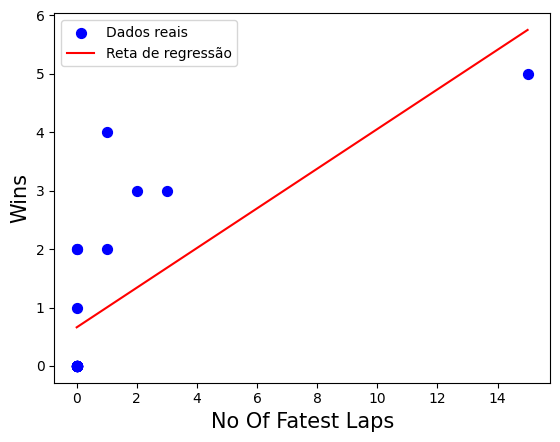

In [ ]:
#Reta ajustada da Regressão Wins x No Of Fatest Laps

a0 = modelo.intercept_      # termo independente (β₀)
a1 = modelo.coef_[0]        # coeficiente angular (β₁)
y_pred = a0 + a1 * x        # ŷ = a0 + a1*x

plt.scatter(x, y, color="b", marker="o", s=50, label="Dados reais")
plt.plot(x, y_pred, color="r", label="Reta de regressão")

plt.xlabel('No Of Fatest Laps', fontsize=15)
plt.ylabel('Wins', fontsize=15)
plt.legend()
plt.show()

In [ ]:
#Correlação de Pearson Wins x No Of Fatest Laps
import pandas as pd
import numpy as np
from scipy.stats import pearsonr # Import pearsonr

# Recarrega apenas as colunas necessárias
data = pd.read_csv('F1_2022_data.csv', header=0)


data['Wins'] = pd.to_numeric(data['Wins'], errors='coerce')
data['No of Fastest Laps'] = pd.to_numeric(data['No of Fastest Laps'], errors='coerce')


data_cleaned = data.dropna(subset=['Wins', 'No of Fastest Laps'])

x = data_cleaned['Wins'].to_numpy()
y = data_cleaned['No of Fastest Laps'].to_numpy()

# --- Calcula a correlação de Pearson ---
corr_matrix = np.corrcoef(x, y)
r_numpy = corr_matrix[0, 1]
print("Correlação de Pearson :", r_numpy)

r_scipy, p_valor = pearsonr(x, y)
print(f"Valor-p: {p_valor:.5f}")

Correlação de Pearson : 0.708791451063652
Valor-p: 0.00022


A Correlação de Pearson mostra uma correlação positiva forte (0.708791451063652), isso significa que quanto mais voltas rápidas um piloto faz, mais vitórias ele tende a ter.

In [ ]:
#R² - Wins x No Of Fatest Laps
from sklearn.metrics import r2_score
y_pred=modelo.predict(X)
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.5023853211009174


O R2 mostra que cerca de 50% da variação no número de vitórias entre os pilotos pode ser explicada linearmente pelo número de voltas mais rápidas que eles fizeram. Mas a outra metade depende de outros fatores. Ou seja, o número de voltas rápidas é um bom indicativo de desempenho e potencial de vitória, mas não é o único fator determinante.

**POS X DNFs**

O número de vezes que um piloto não terminou uma corrida com base na posição final da temporada


Intercept:  10.962469733656176
Coefiente Angular:  [0.1598063]


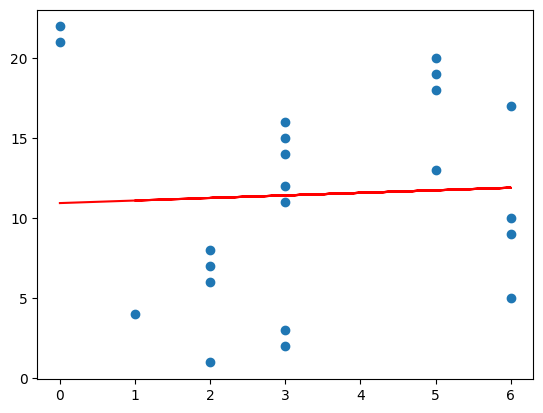

In [ ]:
#
data = pd.read_csv('F1_2022_data.csv', header=0).to_numpy()
y = data[:,0] #POS
x = data[:,9] #DNFs
X = np.array(x).reshape(-1, 1)
Y = np.array(y)
modelo = LinearRegression().fit(X, Y)
print("Intercept: ", modelo.intercept_)
print ("Coefiente Angular: ", modelo.coef_)
plt.scatter(X, Y)
plt.plot(X, modelo.predict(X), color = 'red')

O coeficiente angular indica que, para cada abandono adicional (DNF), o piloto tende a ter um aumento médio de aproximadamente 0,16 posições na classificação final, ou seja, uma pior colocação no campeonato. Isso mostra que os abandonos influenciam negativamente o resultado final, embora o efeito estimado seja pequeno, já que o desempenho geral depende também de fatores como vitórias, pontos e consistência ao longo da temporada.

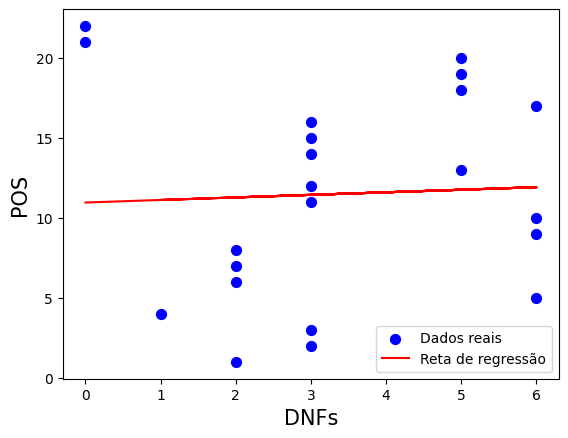

In [ ]:
#Reta ajustada da Regressão POS X DNFs

a0 = modelo.intercept_      # termo independente (β₀)
a1 = modelo.coef_[0]        # coeficiente angular (β₁)
y_pred = a0 + a1 * x        # ŷ = a0 + a1*x

plt.scatter(x, y, color="b", marker="o", s=50, label="Dados reais")
plt.plot(x, y_pred, color="r", label="Reta de regressão")

plt.xlabel('DNFs', fontsize=15)
plt.ylabel('POS', fontsize=15)
plt.legend()
plt.show()

A reta ajustada da regressão linear mostra a tendência média entre o número de abandonos (DNFs) e a posição final dos pilotos. Observa-se uma leve inclinação positiva, indicando que pilotos com mais DNFs tendem a terminar o campeonato em posições mais baixas (maiores valores de POS).

In [ ]:
#Correlação de POS x DNFs
import pandas as pd
import numpy as np
from scipy.stats import pearsonr # Import pearsonr

# Recarrega apenas as colunas necessárias
data = pd.read_csv('F1_2022_data.csv', header=0)


data['DNFs'] = pd.to_numeric(data['DNFs'], errors='coerce')
data['POS'] = pd.to_numeric(data['POS'], errors='coerce')


data_cleaned = data.dropna(subset=['DNFs', 'POS'])

x = data_cleaned['DNFs'].to_numpy()
y = data_cleaned['POS'].to_numpy()

# --- Calcula a correlação de Pearson ---
corr_matrix = np.corrcoef(x, y)
r_numpy = corr_matrix[0, 1]
print("Correlação de Pearson :", r_numpy)


r_scipy, p_valor = pearsonr(x, y)
print(f"Valor-p: {p_valor:.5f}")

Correlação de Pearson : 0.04653645341124882
Valor-p: 0.83707


O coeficiente de correlação de Pearson entre as variáveis POS e DNFs foi de aproximadamente 0,0465, com um valor-p de 0,837.
Esse resultado indica que não há correlação linear significativa entre a posição final no campeonato e o número de abandonos (DNFs).


In [ ]:
#R² - POS x DNFs
from sklearn.metrics import r2_score
y_pred=modelo.predict(X)
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.002165641496097215


O coeficiente de determinação (R²) indica que apenas 0,2%, ou seja, não há relação significativa entre o número de abandonos (DNFs) a posição final do piloto (POS), outros fatores tem muito mais influência sobre o resultado

**Regressão Multípla**

In [ ]:
#regressão multípla

#Points
#Pole Positions
#Podiums
#Wins

df = pd.read_csv("F1_2022_data.csv",index_col=0)
df.head(22)



,Driver Code,Driver Name,Constructor,Points,Pole Positions,No of Fastest Laps,Wins,Podiums,DNFs
POS,,,,,,,,,
1,VER,Max Verstappen,Red Bull Racing RBPT,454,7,5,15,17,2
2,LEC,Charles Leclerc,Ferrari,308,9,3,3,11,3
3,PER,Sergio Perez,Red Bull Racing RBPT,305,1,3,2,11,3
4,RUS,George Russell,Mercedes,275,2,4,1,8,1
5,SAI,Carlos Sainz,Ferrari,246,3,2,1,9,6
6,HAM,Lewis Hamilton,Mercedes,240,0,2,0,9,2
7,NOR,Lando Norris,McLaren Mercedes,122,0,2,0,1,2
8,OCO,Esteban Ocon,Alpine Renault,92,0,0,0,0,2
9,ALO,Fernando Alonso,Alpine Renault,81,0,0,0,0,6


In [ ]:
import statsmodels.formula.api as sm

model = sm.ols(formula='Wins ~ Points + Q("Pole Positions") + Podiums + Q("No of Fastest Laps")', data=df)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     6.576
Date:                Sun, 09 Nov 2025   Prob (F-statistic):            0.00218
Time:                        18:24:33   Log-Likelihood:                -46.159
No. Observations:                  22   AIC:                             102.3
Df Residuals:                      17   BIC:                             107.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Explicação:                                             A váriavel menos significativa em relação as vitórias são os pontos...                                               Um piloto pode ser muito consistente (terminar sempre em 5º, 6º, 7º lugar) e acumular muitos pontos ao longo da temporada.

Outro piloto pode ser inconsistente (ganhar 2 corridas, mas abandonar 5).

No final, o piloto consistente (com 0 vitórias) pode ter mais pontos que o piloto inconsistente (com 2 vitórias).

In [ ]:
import statsmodels.formula.api as sm
#Removendo Points - variavel menos significativa
model = sm.ols(formula='Wins ~  Q("Pole Positions") + Podiums + Q("No of Fastest Laps")', data=df)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     9.142
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           0.000681
Time:                        18:24:33   Log-Likelihood:                -46.262
No. Observations:                  22   AIC:                             100.5
Df Residuals:                      18   BIC:                             104.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
import statsmodels.formula.api as sm
#Removendo No of Fastest Laps, variavel menos siginificativa depois de pontos
model = sm.ols(formula='Wins ~  Q("Pole Positions") + Podiums', data=df)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     14.35
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           0.000159
Time:                        18:24:34   Log-Likelihood:                -46.318
No. Observations:                  22   AIC:                             98.64
Df Residuals:                      19   BIC:                             101.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.3512    

Explicação: Fim do modelo Podiums (coef = 0.7001): "Mantendo as Poles constantes, cada 1 Pódio a mais está associado a um aumento de 0.7 vitórias."

Q("Pole Positions") (coef = 0.6387): "Mantendo os Pódios constantes, cada 1 Pole Position a mais está associada a um aumento de 0.64 vitórias."

O modelo sugere que, embora ambos sejam muito importantes, um Pódio tem um "peso" ligeiramente maior que uma Pole na previsão de uma vitória.